In [1]:
#=_


In [6]:
from PIL import Image
import numpy as np
import math
import collections 

In [329]:
## global variable
maxPixel = 255 ##for gray level image

def img2matrix(img):
    return np.asarray(img).copy()
def matrix2img(matrix):
    return Image.fromarray(matrix)

<hr style="border:2px solid gray"> </hr>

# printing basic info of the image and its matrix

In [145]:
def basicInfo():
    img = Image.open("images/sceneColored.jpg")
    print("(width x height )",img.size)
    grayImg = img.convert('L')
    imgMatrix= np.asarray(grayImg)
    print("(row x col )",imgMatrix.shape)
    print("\n\nmatrix representaion\n",imgMatrix)
    print("showing color img")
    img.show()
    print("showing gray image")
    grayImg.show()

In [146]:
basicInfo() 

(width x height ) (293, 172)
(row x col ) (172, 293)


matrix representaion
 [[129 129 129 ...  98  98  98]
 [130 130 130 ...  97  97  97]
 [132 132 132 ...  96  96  96]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
showing color img
showing gray image


<hr style="border:2px solid gray"> </hr>
## image nagation

In [3]:
def imgNagation(img): # takes image as input 
    imgMatrix = img2matrix(img)
    imgMatrix = imgMatrix 
    for i in range(imgMatrix.shape[0]):
        for j in range(imgMatrix.shape[1]):
            imgMatrix[i][j] = 255 - imgMatrix[i][j]  # new pixelvalue = (max pixel value of the grayscale image) - old pixel value 
    return matrix2img(imgMatrix)

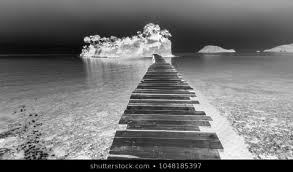

In [186]:
img = Image.open("images/sceneColored.jpg").convert('L')
nagImg = imgNagation(img)
nagImg

<hr style="border:2px solid gray"> </hr>
# GRAYSCALE INTO BINARY IMAGE 

In [187]:
def binaryImg(img,threshold= 127): # floor(255/2)
    imgMatrix = img2matrix(img)   
    for i in range(imgMatrix.shape[0]):
        for j in range(imgMatrix.shape[1]):
            if imgMatrix[i][j] > threshold:
                imgMatrix[i][j] = 255
            else:
                imgMatrix[i][j] = 0
                
    return matrix2img(imgMatrix)


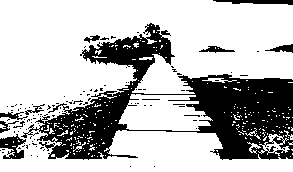

In [243]:
img = Image.open("images/sceneColored.jpg").convert('L')
threshold = 100
binaryImg(img,threshold) # change threshold value between 0 to 255, to get different nature of the image


***
***
#   LOG TRANSFORMATION
### general form of log transformation :
###                                  s = c log(1+r) ;
##### where s is a new pixel value , r is a old pixel value and c is a scaling constant. The value of c is chosen such that we get the maximum output value corresponding to the bit size used. e.g for 8 bit image, c is chosen such that we get max value equal to 255.


In [244]:
def logTransformation(img):
    imgMatrix = img2matrix(img)
    c = 255/(math.log(1 + 255)) # c = 255/(log(1 + max_input_pixel_value))
    for i in range(imgMatrix.shape[0]):
        for j in range(imgMatrix.shape[1]):
            imgMatrix[i][j] = c * math.log(1+imgMatrix[i][j])
    return matrix2img(imgMatrix)

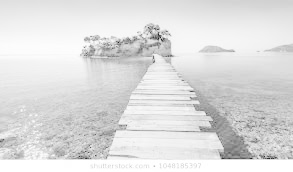

In [245]:
img = Image.open("images/sceneColored.jpg").convert('L')
logTransformation(img)

<hr style="border:2px solid gray"> </hr>

# POWER LAW (GAMMA) TRANSFORMATION 
### general form of gamma transformation:
### &nbsp;&nbsp;&nbsp;  s = c *r <sup>γ<sup>

In [190]:
def powerLaw(img,gamma):
    imgMatrix = img2matrix(img)
    c = int(255/(255**gamma))
    for i in range(imgMatrix.shape[0]):
        for j in range(imgMatrix.shape[1]):
            imgMatrix[i][j] = c * imgMatrix[i][j]**gamma
    return matrix2img(imgMatrix)


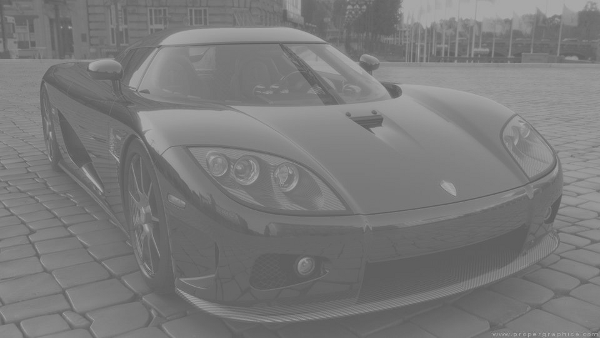

In [193]:
img = Image.open("images/car.png").convert('L')
gamma = 0.99
powerLaw(img,gamma) ## change the gamma value to see the different result

<hr style="border:2px solid gray"> </hr>


# CONTRAST STRETCHING , THRESHOLDING , CLIPPING


---
***
# HISTOGRAM EQUILIZATION

In [165]:

def histoEquilization(img):
    imgMatrix = img2matrix(img)
    pixels = list(imgMatrix.flatten())
    pixels.sort()
    freq = collections.Counter(pixels)
    pixelFreqTuple = (sorted(freq.items()))
    #list of available pixels in the image
    pixs = [key for (key,value) in pixelFreqTuple]
    #frequency of each pixels
    freq = [value for (key,value) in pixelFreqTuple]
    totalPixels = imgMatrix.size # sum(freq) --> both give the same result
    #normal frequency 
    normalFreq = [ data/totalPixels for data in freq]
    #cumulative normal frequency / cdf
    cumFreq = normalFreq
    for i in range(len(cumFreq)-1):
            cumFreq[i+1] = cumFreq[i]+cumFreq[i+1]
    
    
    histoEqui = [math.floor(maxPixel*data) for data in cumFreq ] ##equilization and roundoff
    
    # new pixels 
    newPixels = histoEqui
    
    # dict of old and new pixels
    dictPix = dict(zip(pixs,newPixels))
    
    # new image
    
    for i in range(imgMatrix.shape[0]):
        for j in range(imgMatrix.shape[1]):
            imgMatrix[i][j] = dictPix[imgMatrix[i][j]]
    
    return matrix2img(imgMatrix)
   
    
    
    

In [170]:
img = Image.open("images/car.png").convert('L')


## old image:

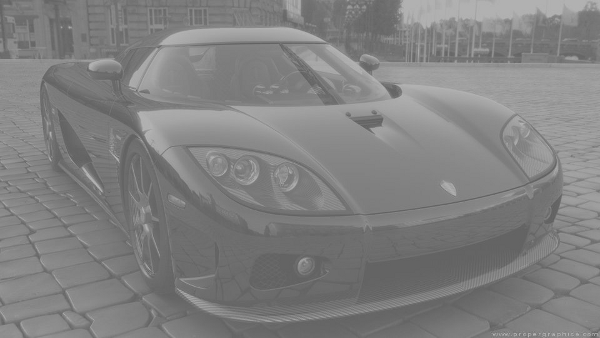

In [172]:
img

## new Image(after histogram equilization):

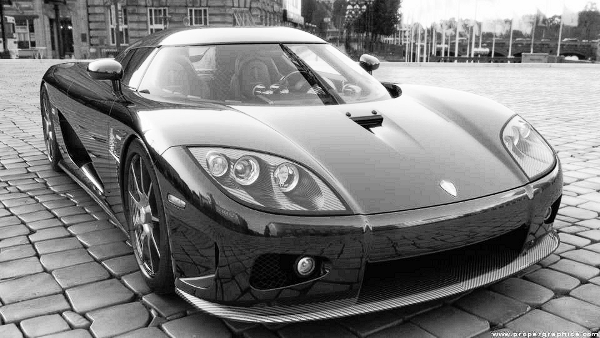

In [173]:
histoEquilization(img)

<hr style="border:2px solid gray"> </hr>

# INTENSITY LEVEL SLICING

## without background:
        s ={ L  if a <= r <= b
           { 0  else
## with background:
        s = { L if a<= r <= b
            { r else

In [223]:
def ILSwithoutBackground(img,a,b):
    imgMatrix = img2matrix(img)
    for i in range(imgMatrix.shape[0]):
        for j in range(imgMatrix.shape[1]):
            r = imgMatrix[i][j]
            if ( r >= a and r <= b):
                imgMatrix[i][j] = maxPixel
            else:
                imgMatrix[i][j] = 0
    return matrix2img(imgMatrix)

In [224]:
def ILSwithBackground(img,a,b):
    imgMatrix = img2matrix(img)
    for i in range(imgMatrix.shape[0]):
        for j in range(imgMatrix.shape[1]):
            r = imgMatrix[i][j]
            if (r >= a and r <= b):
                imgMatrix[i][j] = maxPixel
            
    return matrix2img(imgMatrix)

### old image:

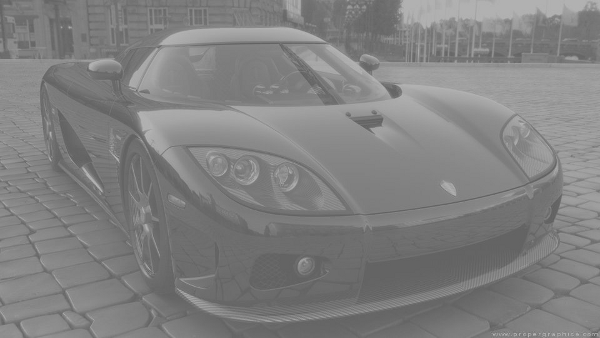

In [227]:

img = Image.open("images/car.png").convert('L')
img

### intensity level slicing with background:

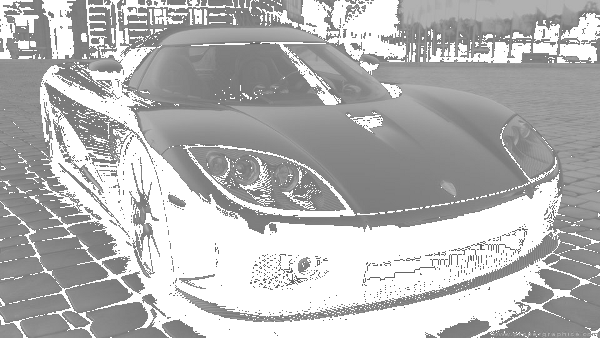

In [228]:
ILSwithBackground(img,100,120)

### intensity level slicing without background:

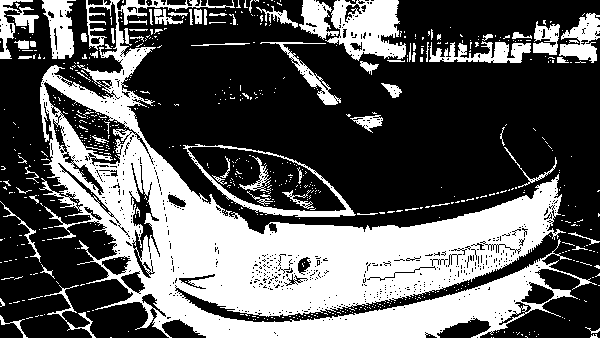

In [229]:
ILSwithoutBackground(img,100,120)


<hr style="border:2px solid gray"> </hr><hr style="border:2px solid gray"> </hr>

# Image magnification 🔎

## 1. zero interlacing

In [330]:
def zeroInterlacing(img):
    imgMatrix = img2matrix(img)
    oldHeight = imgMatrix.shape[0]
    oldWidth = imgMatrix.shape[1]
    newHeight = 2*oldHeight
    newWidth = 2 * oldWidth 

    ## providing zero interlacing
    newImgMatrix = np.zeros((newHeight,newWidth),dtype=int) 
    newImgMatrix[::2,::2] = imgMatrix[:,:]
    
    ## convolution
    ## mask = [[1,1],[1,1]]
    for r in range(0,newImgMatrix.shape[0]-1,2):
        for c in range(0,newImgMatrix.shape[1]-1,2):
            ##masking
                for i in range(2):
                    for j in range(2):
                        newImgMatrix[r+i][c+j]= newImgMatrix[r][c]
#     print(newImgMatrix)
#     print(imgMatrix)
    return matrix2img(newImgMatrix)

In [331]:
img = Image.open("images/women.gif").convert('L')
magnifiedImg = zeroInterlacing(img)

## before magnification:

In [335]:
img.show()
print(img.size)

(256, 256)


### After magnification

In [340]:
magnifiedImg.show()
print(magnifiedImg.size)

(512, 512)


## double magnification
***Note that we can perform crop operation to maintain the viewport size***

In [342]:
dblMagnifiedImg = zeroInterlacing(magnifiedImg)
dblMagnifiedImg.show()
print("size of the result image",dblMagnifiedImg.size) 


size of the result image (1024, 1024)


<hr style="border:2px solid gray"> </hr>

## 2.  Linear interpolation

In [362]:
def linearInterpolation(img):
    imgMatrix = img2matrix(img)
    oldHeight = imgMatrix.shape[0]
    oldWidth = imgMatrix.shape[1]
    newHeight = 2*oldHeight
    newWidth = 2 * oldWidth 

    ## providing zero interlacing
    newImgMatrix = np.zeros((newHeight,newWidth),dtype=int) 
    newImgMatrix[::2,::2] = imgMatrix[:,:]
    
    ## convolution
    ## mask = [[1,1],[1,1]]
    for r in range(0,newImgMatrix.shape[0]-1,2): ## for column interpolation 
        for c in range(1,newImgMatrix.shape[1],2):
                    if c != newImgMatrix.shape[1]-1: 
                        newImgMatrix[r][c]= math.ceil(newImgMatrix[r][c-1]+newImgMatrix[r][c+1])/2 
                    else: # for last column
                        newImgMatrix[r][c]= math.ceil(newImgMatrix[r][c-1])/2
                        
    for r in range(1,newImgMatrix.shape[0],2): ## for row interpolation 
        for c in range(0,newImgMatrix.shape[1]):
            if r != newImgMatrix.shape[0]-1:
                newImgMatrix[r][c] = math.ceil(newImgMatrix[r-1][c]+newImgMatrix[r+1][c])/2
            else:
                newImgMatrix[r][c] = math.ceil(newImgMatrix[r-1][c])/2
                        
#     print(newImgMatrix)
#     print(imgMatrix)
#     print(newImgMatrix)
    return matrix2img(newImgMatrix)
    

In [366]:
img = Image.open("images/face.jpg").convert('L')
magnifiedImg = linearInterpolation(img)


###  before magnification:


In [371]:
img.show()
print(img.size)

(1024, 684)


### after magnification:

In [370]:
magnifiedImg.show()
print(magnifiedImg.size)

(2048, 1368)
